In [4]:
# import the required library 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# load the dataset
df0 = pd.read_csv("/content/drive/Shareddrives/enoe/water-level-infrared/dataset/testeV1_turbidez0_202209021523.csv")
df1 = pd.read_csv("/content/drive/Shareddrives/enoe/water-level-infrared/dataset/testeV1_turbidez1_202209021523.csv")
df2 = pd.read_csv("/content/drive/Shareddrives/enoe/water-level-infrared/dataset/testeV1_turbidez2_202209021523.csv")

In [7]:
df0['turbidity'] = 'low'
df1['turbidity'] = 'mid'
df2['turbidity'] = 'high'
df = pd.concat([df0,df1,df2])
df['water_level'] = pd.to_numeric( df['water_level'] )

In [8]:
print(df.columns)

Index(['id', 'ir_value', 'ir_strength', 'us_value', 'acc_x', 'acc_y', 'acc_z',
       'gyr_acc_x', 'gyr_acc_y', 'gyr_acc_z', 'gyr_x', 'gyr_y', 'gyr_z',
       'angle', 'water_level', 'turbidity'],
      dtype='object')


In [9]:
df_melt = pd.melt(df,
                  id_vars=['water_level', 'angle', 'turbidity'],
                  value_vars=['ir_value','us_value'], 
                  var_name='sensor_type', 
                  value_name='sensor_value')

# Drop Zeros values in dataframe
df_clean = df_melt.drop( df_melt[df_melt['sensor_value'] == 0].index )

Plot graphics functions

In [23]:
# plot bar 
def plotBar(df,
            size_width=10, 
            size_height=6, 
            horizontal=False, 
            xCol='', 
            yCol='',
            hueCol='turbidity',
            dataCol='water_level'):
  orientPlot = 'v'
  if horizontal:
    orientPlot = 'h'

  sns.set_style('darkgrid')
  df['turbidity'] = pd.Categorical(df['turbidity'],
                                   categories=['low', 'mid', 'high']).rename_categories({'mid':'medium'})
  df.sort_values(by='turbidity', inplace=True)
  fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(size_width,size_height), dpi=130)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] ==  50], ax=axes[0,0], orient=orientPlot)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] == 100], ax=axes[0,1], orient=orientPlot)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] == 150], ax=axes[1,0], orient=orientPlot)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] == 200], ax=axes[1,1], orient=orientPlot)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] == 250], ax=axes[2,0], orient=orientPlot)
  sns.barplot(x=xCol, y=yCol, hue=hueCol, data=df[df[dataCol] == 300], ax=axes[2,1], orient=orientPlot)
  if not horizontal:
    axes[0,0].axhline(y = 50 , color='black', linestyle = 'dashed')
    axes[0,1].axhline(y = 100, color='black', linestyle = 'dashed')
    axes[1,0].axhline(y = 150, color='black', linestyle = 'dashed')
    axes[1,1].axhline(y = 200, color='black', linestyle = 'dashed')
    axes[2,0].axhline(y = 250, color='black', linestyle = 'dashed')
    axes[2,1].axhline(y = 300, color='black', linestyle = 'dashed')
    axes[2,0].set_xlabel('Angle (degrees)')
    axes[0,0].set_ylabel('Value')
    axes[1,0].set_ylabel('Value')
    axes[2,0].set_ylabel('Value')
    axes[2,1].set_xlabel('')
  else:
    axes[2,0].set_xlabel('Number of non-zero samples')
    axes[2,1].set_xlabel('Number of non-zero samples')
    axes[0,0].set_ylabel('$\\theta$')
    axes[1,0].set_ylabel('$\\theta$')
    axes[2,0].set_ylabel('$\\theta$')
    for i in range(6):
      axes[i//2,i%2].set_yticklabels(['$0.0^\circ$',
                                      '$2.5^\circ$',
                                      '$5.0^\circ$',
                                      '$7.5^\circ$',
                                      '$10.0^\circ$'])
  axes[0,0].legend().set_visible(False)
  axes[1,0].legend().set_visible(False)
  axes[2,0].legend().set_visible(False)
  axes[0,1].legend().set_visible(False)
  axes[1,1].legend().set_visible(False)
  axes[2,1].legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
  axes[0,0].set_xlabel('')
  axes[1,0].set_xlabel('')
  axes[0,1].set_xlabel('')
  axes[1,1].set_xlabel('')
  axes[0,1].set_ylabel('')
  axes[1,1].set_ylabel('')
  axes[2,1].set_ylabel('')
  axes[0,0].set_title('$h=50$ $cm$')
  axes[0,1].set_title('$h=100$ $cm$')
  axes[1,0].set_title('$h=150$ $cm$')
  axes[1,1].set_title('$h=200$ $cm$')
  axes[2,0].set_title('$h=250$ $cm$')
  axes[2,1].set_title('$h=300$ $cm$')
  fig.tight_layout()
  return fig

def plotAllData(df_h):
  fig = plotBar(df_h, 
                size_height=5,
                xCol='angle',
                yCol='sensor_value',
                hueCol='turbidity', 
                dataCol='water_level')
  return fig

def plotCounterCollectData(df_h):
  occur = df_h.groupby(['water_level', 'angle', 'turbidity', 'sensor_type']).size().to_frame(name = 'counter').reset_index()
  fig = plotBar(occur, horizontal=True, xCol='counter', yCol='angle')
  return fig

<ipython-input-23-78f16413ebc1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['turbidity'] = pd.Categorical(df['turbidity'],
<ipython-input-23-78f16413ebc1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='turbidity', inplace=True)


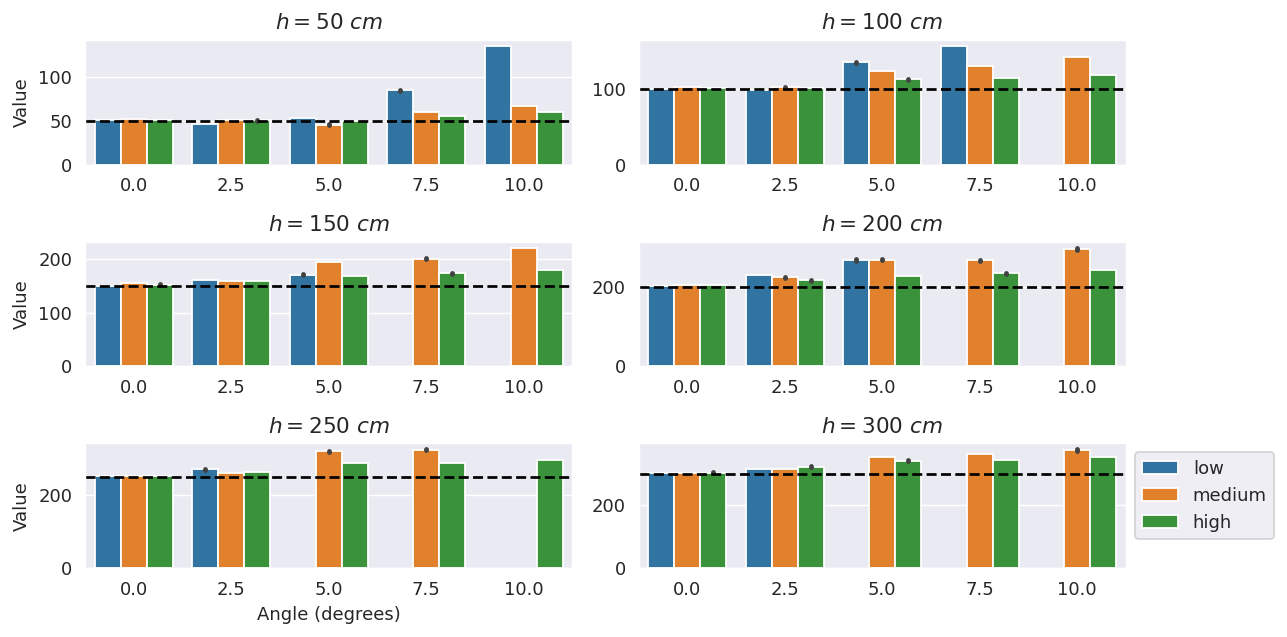

In [24]:
fig = plotAllData(df_clean[df_clean['sensor_type']=='ir_value'])

<ipython-input-23-78f16413ebc1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['turbidity'] = pd.Categorical(df['turbidity'],
<ipython-input-23-78f16413ebc1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='turbidity', inplace=True)


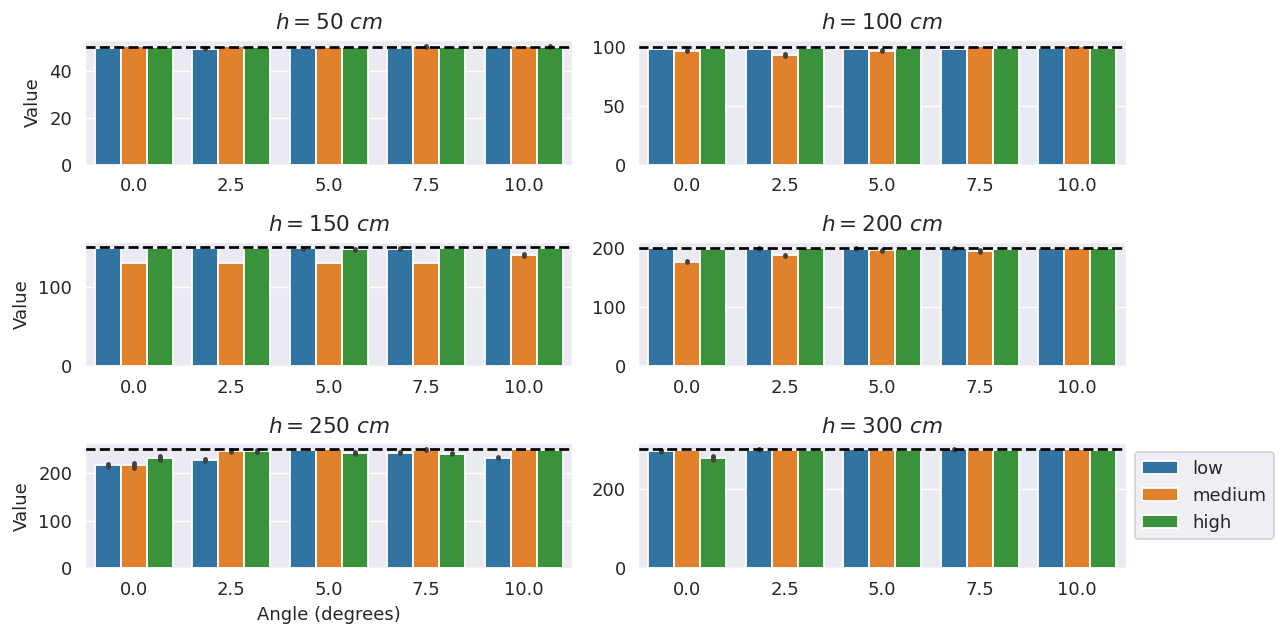

In [25]:
fig = plotAllData(df_clean[df_clean['sensor_type']=='us_value'])

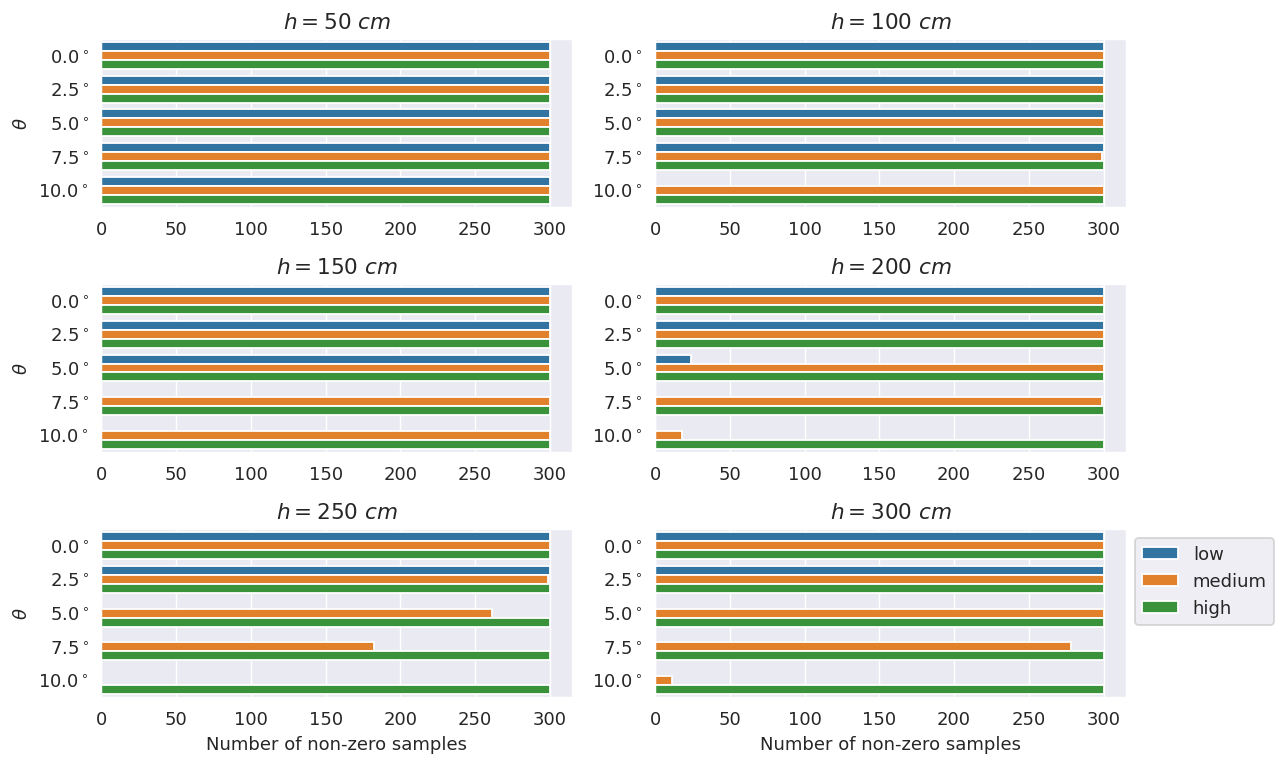

In [28]:
fig = plotCounterCollectData(df_clean[df_clean['sensor_type']=='ir_value'])
fig.savefig('/content/drive/Shareddrives/enoe/water-level-infrared/results/ir_nonzero.pdf')

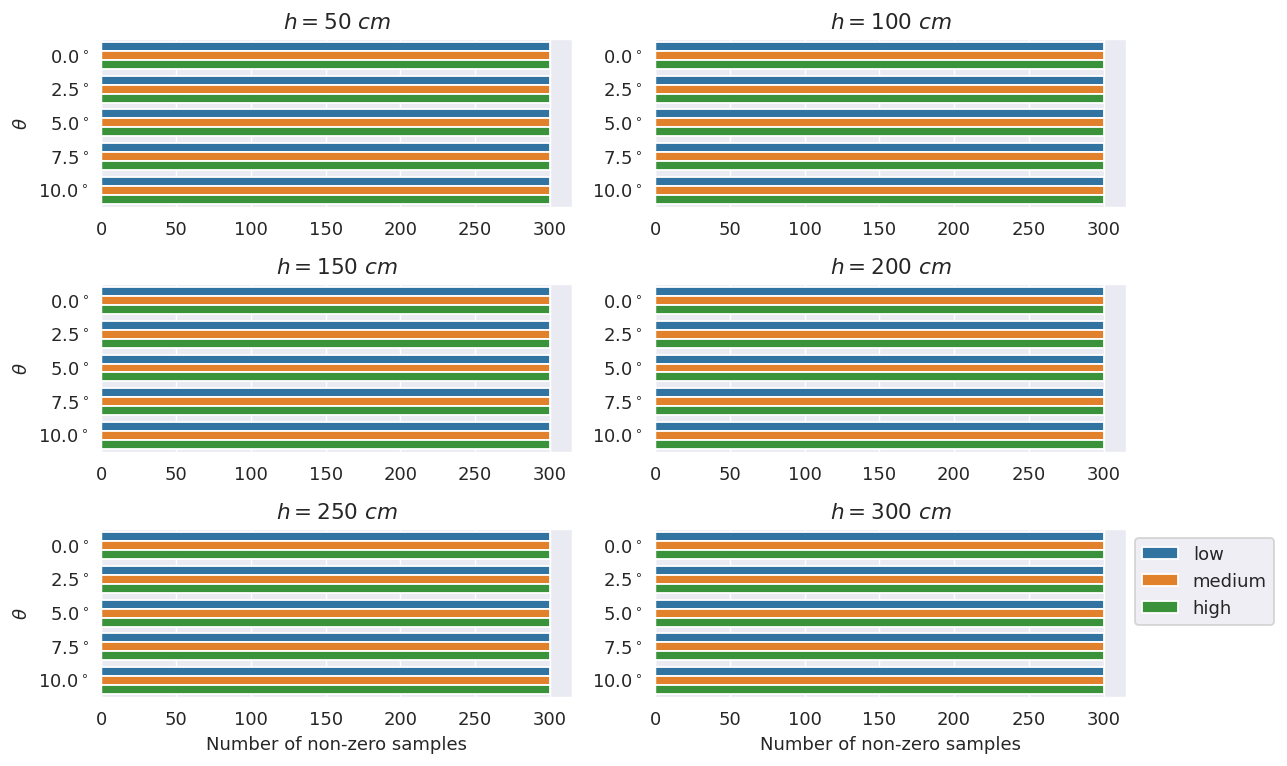

In [27]:
fig = plotCounterCollectData(df_clean[df_clean['sensor_type']=='us_value'])